En este script se prueban distintos filtros previos a la segmentación de las células de la madera.

In [3]:
import numpy as np
import imutils
import matplotlib.pyplot as plt
import cv2 as cv
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage



(1842, 2456, 3)


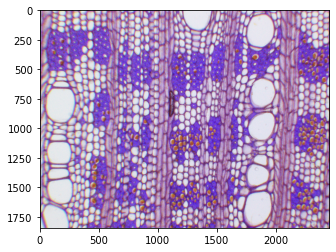

In [4]:
img = plt.imread('../Data/Mappia_photos/10X/mappia_10x_0005.tif')
img_cv = cv.imread('../Data/Mappia_photos/10X/mappia_10x_0005.tif')
img_array = np.asarray(img)
print(img_array.shape)
plt.imshow(img_cv)

(array([  95465.,  364385.,  791435., 1018418., 1419301., 1798699.,
        2062545., 2102884., 2588505., 1330219.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

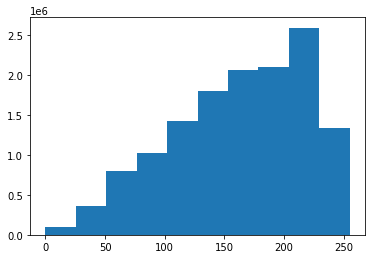

In [5]:
plt.hist(img_array.ravel())

In [6]:
rgb_img = cv.cvtColor(img_cv, cv.COLOR_BGR2RGB)
gray_img = cv.cvtColor(img_cv, cv.COLOR_BGR2GRAY)
bgr_img = cv.cvtColor(rgb_img, cv.COLOR_RGB2BGR)

cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_rgb.png', rgb_img)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_rgay.png', gray_img)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_bgr.png', bgr_img)

True

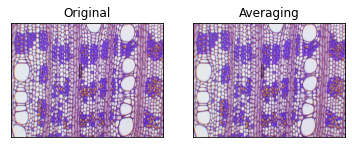

True

In [7]:
kernel = np.ones((7,7),np.float32)/49
dst = cv.filter2D(bgr_img,-1,kernel)

plt.subplot(121),plt.imshow(bgr_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_filter.png', dst)

True

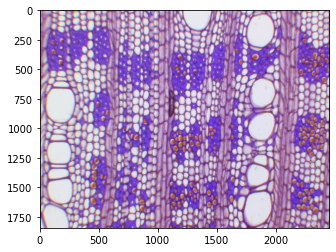

In [8]:
blur = cv.GaussianBlur(bgr_img,(5,5),0)
plt.imshow(blur)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_gausblur.png', blur)

True

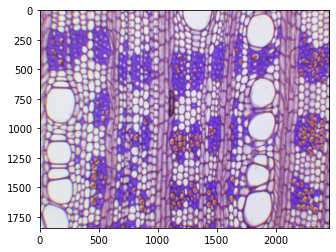

In [9]:
median = cv.medianBlur(bgr_img,5)
plt.imshow(median)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_median.png', median)

True

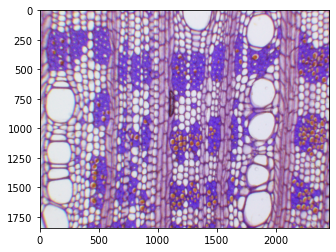

In [10]:
bil = cv.bilateralFilter(bgr_img,9,200,200)
plt.imshow(bil)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_bil.png', bil)

True

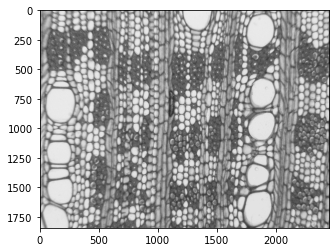

In [11]:
#Convertirla a escala de grises
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray", vmin=0, vmax=255)

gray_dst = cv.cvtColor(dst,cv.COLOR_BGR2GRAY)
gray_blur = cv.cvtColor(blur,cv.COLOR_BGR2GRAY)
gray_median = cv.cvtColor(median,cv.COLOR_BGR2GRAY)
gray_bil = cv.cvtColor(bil,cv.COLOR_BGR2GRAY)

cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_graydst.png', gray_dst)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_grayblur.png', gray_blur)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_graymedian.png', gray_median)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_graybil.png', gray_bil)

In [12]:
# global thresholding
ret1,th1_dst = cv.threshold(gray_dst,127,255,cv.THRESH_BINARY) #dst filter
# Otsu's thresholding
ret2,th2_dst = cv.threshold(gray_dst,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) #dst filter
# global thresholding
ret1,th1_blur = cv.threshold(gray_blur,127,255,cv.THRESH_BINARY) #gaussian blur
# Otsu's thresholding
ret2,th2_blur = cv.threshold(gray_blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) #gaussian blur
# global thresholding
ret1,th1_med = cv.threshold(gray_median,127,255,cv.THRESH_BINARY) #Median filter
# Otsu's thresholding
ret2,th2_med = cv.threshold(gray_median,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) #median filter
# global thresholding
ret1,th1_bil = cv.threshold(gray_bil,127,255,cv.THRESH_BINARY) #bilateral filter
# Otsu's thresholding
ret2,th2_bil = cv.threshold(gray_bil,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) #bilateral filter

In [13]:
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th1dst.png', th1_dst)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th2dst.png', th2_dst)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th1blur.png', th1_blur)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th2blur.png', th2_blur)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th1med.png', th1_med)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th2med.png', th2_med)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th1bil.png', th1_bil)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th2bil.png', th2_bil)

True

In [14]:
th1dst_2 = cv.bitwise_not(th1_dst)
th2dst_2 = cv.bitwise_not(th2_dst)
th1blur_2 = cv.bitwise_not(th1_blur)
th2blur_2 = cv.bitwise_not(th2_blur)
th1med_2 = cv.bitwise_not(th1_med)
th2med_2 = cv.bitwise_not(th2_med)
th1bil_2 = cv.bitwise_not(th1_bil)
th2bil_2 = cv.bitwise_not(th2_bil)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th1dst_2.png', th1dst_2)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th2dst_2.png', th2dst_2)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th1blur_2.png', th1blur_2)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th2blur_2.png', th2blur_2)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th1med_2.png', th1med_2)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th2med_2.png', th2med_2)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th1bil_2.png', th1bil_2)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th2bil_2.png', th2bil_2)

True

In [15]:
smooth = cv.addWeighted(blur,1.5,img,-0.5,0)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_edges.png', smooth)
gray_smooth = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_edgray.png', gray_smooth)
# global thresholding
ret1,th1_smooth = cv.threshold(gray_smooth,127,255,cv.THRESH_BINARY) #dst filter
# Otsu's thresholding
ret2,th2_smooth = cv.threshold(gray_smooth,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) #dst filter
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th1smooth.png', th1_smooth)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th2smooth.png', th2_smooth)
#
th1smooth_2 = cv.bitwise_not(th1_smooth)
th2smooth_2 = cv.bitwise_not(th2_smooth)
#
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th1smooth_2.png', th1smooth_2)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th2smooth_2.png', th2smooth_2)

True

Aquí se realiza un adelgazamiento de las paredes.

In [16]:
smooth_thinned = cv.ximgproc.thinning(th2smooth_2)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_smooth_thinned.png', smooth_thinned)

True

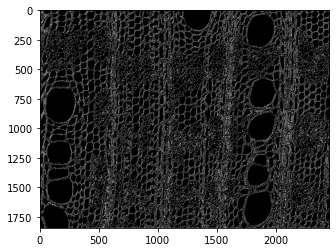

In [17]:
plt.imshow(smooth_thinned, cmap="gray", vmin=0, vmax=255)

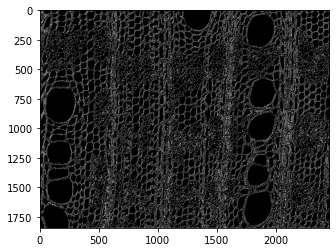

In [18]:
blur_thinned = cv.ximgproc.thinning(th2blur_2)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_blur_thinned.png', blur_thinned)
plt.imshow(smooth_thinned, cmap="gray", vmin=0, vmax=255)

In [19]:
# convolute with proper kernels
laplacian = cv.Laplacian(gray_bil,cv.CV_64F)
sobelx = cv.Sobel(gray_bil,cv.CV_64F,1,0,ksize=5)  # x
sobely = cv.Sobel(gray_bil,cv.CV_64F,0,1,ksize=5)  # y
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_lapl.png', laplacian)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_sobel.png', sobelx)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_sobely.png', sobely)

True

In [20]:
#Convertirla a escala de grises
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

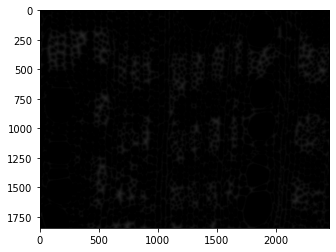

In [21]:
plt.imshow(dist_transform, cmap="gray", vmin=0, vmax=255)

True

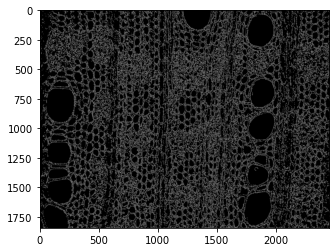

In [22]:
edges = cv.Canny(gray,100,200)
plt.imshow(edges, cmap="gray", vmin=0, vmax=255)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_cannyedges.png', edges)

Tratar de hacer el algoritmo de watershed 

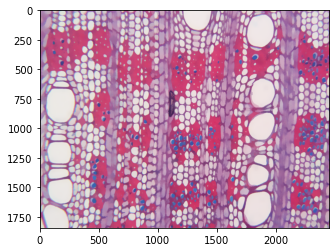

In [23]:
shifted = cv.pyrMeanShiftFiltering(img, 21, 51)
plt.imshow(shifted, cmap="gray", vmin=0, vmax=255)

In [24]:
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_shifted.png',shifted)

True

In [25]:
gray_shifted = cv.cvtColor(shifted,cv.COLOR_BGR2GRAY)
# global thresholding
ret1,th1_shifted = cv.threshold(gray_shifted,127,255,cv.THRESH_BINARY) #dst filter
# Otsu's thresholding
ret2,th2_shifted = cv.threshold(gray_shifted,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) #dst filter
#
th1shifted_2 = cv.bitwise_not(th1_shifted)
th2shifted_2 = cv.bitwise_not(th2_shifted)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th1shifted.png',th1_shifted)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th2shifted.png',th2_shifted)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th1shifted_2.png', th2shifted_2)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_th2shifted_2.png', th2shifted_2)

True

In [29]:
# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
D = ndimage.distance_transform_edt(th2_shifted)
localMax = peak_local_max(D, indices=False, min_distance=20,
    labels=thresh)
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

[INFO] 2271 unique segments found


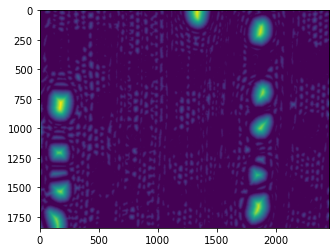

In [30]:
plt.imshow(D)

In [ ]:
# loop over the unique labels returned by the Watershed
# algorithm
for label in np.unique(labels):
    # if the label is zero, we are examining the 'background'
    # so simply ignore it
    if label == 0:
        continue
    # otherwise, allocate memory for the label region and draw
    # it on the mask
    mask = np.zeros(gray.shape, dtype="uint8")
    mask[labels == label] = 255
    # detect contours in the mask and grab the largest one
    cnts = cv.findContours(mask.copy(), cv.RETR_EXTERNAL,
        cv.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv.contourArea)
    # draw a circle enclosing the object
    ((x, y), r) = cv.minEnclosingCircle(c)
    cv.circle(img, (int(x), int(y)), int(r), (0, 255, 0), 2)
    cv.putText(img, "#{}".format(label), (int(x) - 10, int(y)),
        cv.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
# show the output image
plt.imshow(img)
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_watershed.png',img)

True

In [22]:
# find contours in the thresholded image
#cnts = cv.findContours(th3_2, cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cnts,hierarchy=cv.findContours(blur_thinned,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)
#cnts = imutils.grab_contours(cnts)
hierarchy.shape
print(hierarchy)

[[[   1   -1   -1   -1]
  [   2    0   -1   -1]
  [   3    1   -1   -1]
  ...
  [1855 1853   -1   24]
  [1856 1854   -1   24]
  [  -1 1855   -1   24]]]


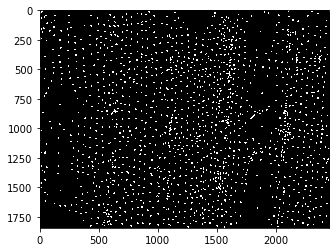

In [23]:
#make array of centroids
centroids=[]
#Array of areas
areas=[]
#Array for perimeters
perimeters=[]
# loop over the contours
for c in cnts:
    # compute the center of the contour
    M = cv.moments(c) #que es moments?¡¿
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0
    # draw the contour and center of the shape on the image
    cv.drawContours(blur_thinned, [c], -1, (0, 255, 0), 2)
    cv.circle(blur_thinned, (cX, cY), 7, (255, 255, 255), -1)
    centroids.append([cX, cY])
    areas.append(cv.contourArea(c))
    perimeters.append(cv.arcLength(c,True))

    #cv.putText(th2, "center", (cX - 20, cY - 20),cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    # display the image
    #cv.imshow("Image", th2)
plt.imshow(blur_thinned,cmap="gray", vmin=0, vmax=255)

In [25]:
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_blur_centroids.png', blur_thinned)

True

In [44]:
# find contours in the thresholded image
#cnts = cv.findContours(th3_2, cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cnts,hierarchy=cv.findContours(th2blur_2,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)
#cnts = imutils.grab_contours(cnts)
hierarchy.shape
print(hierarchy)

[[[   1   -1   -1   -1]
  [   2    0   -1   -1]
  [   3    1   -1   -1]
  ...
  [1860 1858   -1   25]
  [1861 1859   -1   25]
  [  -1 1860   -1   25]]]


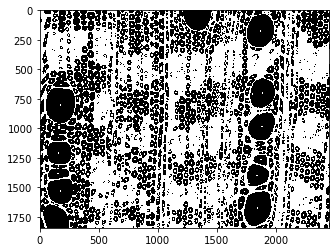

In [49]:
#make array of centroids
centroids_1=[]
#Array of areas
areas_1=[]
#Array for perimeters
perimeters_1=[]
# loop over the contours
for c in cnts:
    # compute the center of the contour
    M = cv.moments(c) #que es moments?¡¿
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0
    # draw the contour and center of the shape on the image
    cv.drawContours(th2blur_2, [c], -1, (0, 255, 0), 2)
    cv.circle(th2blur_2, (cX, cY), 7, (255, 255, 255), -1)
    centroids_1.append([cX, cY])
    areas_1.append(cv.contourArea(c))
    perimeters_1.append(cv.arcLength(c,True))

    #cv.putText(th2, "center", (cX - 20, cY - 20),cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    # display the image
    #cv.imshow("Image", th2)
plt.imshow(th2blur_2,cmap="gray", vmin=0, vmax=255)

In [46]:
cv.imwrite('../Data/Mappia_photos/10X/mappia_10x_0005_blur2centroids.png', th2blur_2)

True

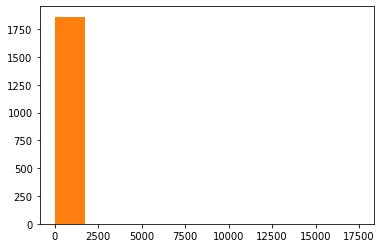

In [101]:
#plt.bar(perimeters,bins=bins, align='center')
#plt.xticks(ticks, labels)
plt.hist(perimeters)
plt.hist(perimeters_1)
plt.show()